In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/cybersecurity_intrusion_data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Display basic info
print("📌 Dataset Info:")
df.info()

# Display first few rows
df.head()


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
# Check for missing values
print("📌 Missing Values in Dataset:")
print(df.isnull().sum())

# Check class distribution
print("\n📌 Class Distribution:")
print(df.iloc[:, -1].value_counts())  # Assuming last column is the target (update if needed)

# Check data types of columns
print("\n📌 Column Data Types:")
print(df.dtypes)


📌 Missing Values in Dataset:
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

📌 Class Distribution:
attack_detected
0    5273
1    4264
Name: count, dtype: int64

📌 Column Data Types:
session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop session_id (not useful for training)
df.drop(columns=["session_id"], inplace=True)

# Fill missing values in encryption_used (mode is best for categorical data)
df["encryption_used"].fillna(df["encryption_used"].mode()[0], inplace=True)

# Convert categorical columns into numbers using Label Encoding
categorical_cols = ["protocol_type", "encryption_used", "browser_type"]
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Verify changes
print("📌 Data after Cleaning & Encoding:")
print(df.head())


📌 Data after Cleaning & Encoding:
   network_packet_size  protocol_type  login_attempts  session_duration  \
0                  599              1               4        492.983263   
1                  472              1               3       1557.996461   
2                  629              1               3         75.044262   
3                  804              2               4        601.248835   
4                  453              1               5        532.540888   

   encryption_used  ip_reputation_score  failed_logins  browser_type  \
0                1             0.606818              1             1   
1                1             0.301569              0             2   
2                1             0.739164              2             0   
3                1             0.123267              0             4   
4                0             0.054874              1             2   

   unusual_time_access  attack_detected  
0                    0                1 

<ipython-input-3-2047a9bf2662>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["encryption_used"].fillna(df["encryption_used"].mode()[0], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["attack_detected"])  # All columns except target
y = df["attack_detected"]  # Target column

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check dataset shapes
print(f"📌 Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


📌 Training Set: (7629, 9), Testing Set: (1908, 9)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Model Accuracy: 0.8836

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1055
           1       0.99      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



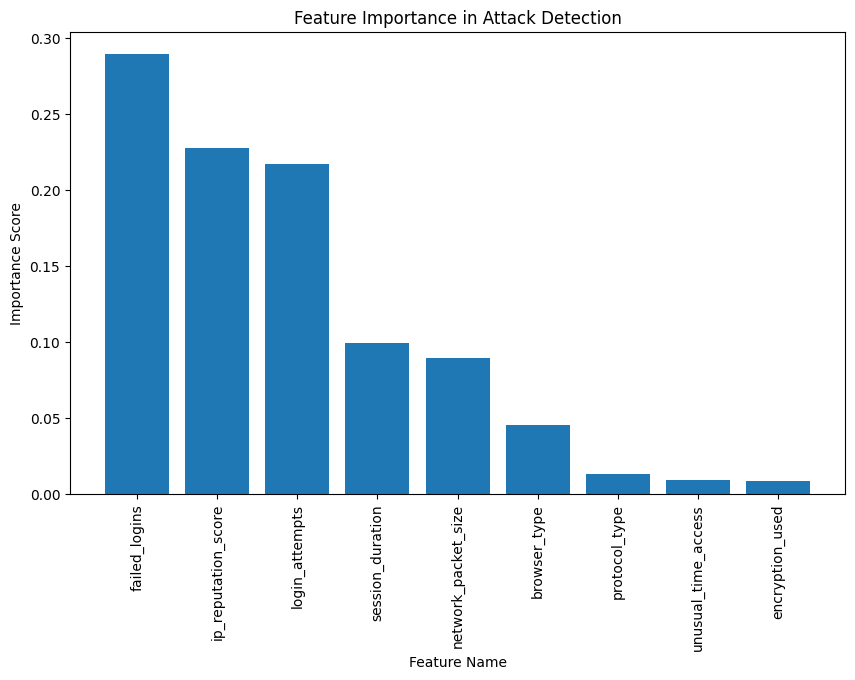

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Attack Detection")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
import pandas as pd

# Define column names (same as used in training)
feature_columns = [
    "network_packet_size", "protocol_type", "login_attempts", "session_duration",
    "encryption_used", "ip_reputation_score", "failed_logins", "browser_type",
    "unusual_time_access"
]

# Convert test samples to DataFrame with correct column names
sample_inputs_df = pd.DataFrame(sample_inputs, columns=feature_columns)

# Predict using the trained model
sample_predictions = rf_model.predict(sample_inputs_df)

# Display results
for i, pred in enumerate(sample_predictions):
    status = "Attack Detected 🚨" if pred == 1 else "Normal Traffic ✅"
    print(f"🔹 Sample {i+1}: {status}")


🔹 Sample 1: Normal Traffic ✅
🔹 Sample 2: Attack Detected 🚨


In [ ]:
import pandas as pd

# Define column names (same as used in training)
feature_columns = [
    "network_packet_size", "protocol_type", "login_attempts", "session_duration",
    "encryption_used", "ip_reputation_score", "failed_logins", "browser_type",
    "unusual_time_access"
]

# Function to get user input and predict attack detection
def manual_prediction():
    print("\n🔹 Enter values for the following features:")
    user_data = []

    user_data.append(int(input("Network Packet Size (e.g., 500): ")))
    user_data.append(int(input("Protocol Type (1 for HTTP, 2 for HTTPS, etc.): ")))
    user_data.append(int(input("Login Attempts (e.g., 3): ")))
    user_data.append(float(input("Session Duration (e.g., 300.5): ")))
    user_data.append(int(input("Encryption Used (1 for Yes, 0 for No): ")))
    user_data.append(float(input("IP Reputation Score (0 to 1, e.g., 0.45): ")))
    user_data.append(int(input("Failed Logins (e.g., 2): ")))
    user_data.append(int(input("Browser Type (1 for Chrome, 2 for Firefox, etc.): ")))
    user_data.append(int(input("Unusual Time Access (1 for Yes, 0 for No): ")))

    # Convert input to DataFrame
    user_input_df = pd.DataFrame([user_data], columns=feature_columns)

    # Predict using the trained model
    prediction = rf_model.predict(user_input_df)[0]

    # Display result
    status = "🚨 Attack Detected!" if prediction == 1 else "✅ Normal Traffic"
    print(f"\n🔍 Prediction Result: {status}")

# Run the function for manual input prediction
manual_prediction()



🔹 Enter values for the following features:
Network Packet Size (e.g., 500): 900
Protocol Type (1 for HTTP, 2 for HTTPS, etc.): 3
Login Attempts (e.g., 3): 5
Session Duration (e.g., 300.5): 50.2
Encryption Used (1 for Yes, 0 for No): 0
IP Reputation Score (0 to 1, e.g., 0.45): 0.1
Failed Logins (e.g., 2): 4
Browser Type (1 for Chrome, 2 for Firefox, etc.): 1
Unusual Time Access (1 for Yes, 0 for No): 1

🔍 Prediction Result: 🚨 Attack Detected!


In [ ]:
import pandas as pd

# Define column names (same as used in training)
feature_columns = [
    "network_packet_size", "protocol_type", "login_attempts", "session_duration",
    "encryption_used", "ip_reputation_score", "failed_logins", "browser_type",
    "unusual_time_access"
]

# Function to get user input and predict attack detection
def manual_prediction():
    print("\n🔹 Enter values for the following features:")
    user_data = []

    user_data.append(int(input("Network Packet Size (e.g., 500): ")))
    user_data.append(int(input("Protocol Type (1 for HTTP, 2 for HTTPS, etc.): ")))
    user_data.append(int(input("Login Attempts (e.g., 3): ")))
    user_data.append(float(input("Session Duration (e.g., 300.5): ")))
    user_data.append(int(input("Encryption Used (1 for Yes, 0 for No): ")))
    user_data.append(float(input("IP Reputation Score (0 to 1, e.g., 0.45): ")))
    user_data.append(int(input("Failed Logins (e.g., 2): ")))
    user_data.append(int(input("Browser Type (1 for Chrome, 2 for Firefox, etc.): ")))
    user_data.append(int(input("Unusual Time Access (1 for Yes, 0 for No): ")))

    # Convert input to DataFrame
    user_input_df = pd.DataFrame([user_data], columns=feature_columns)

    # Predict using the trained model
    prediction = rf_model.predict(user_input_df)[0]

    # Display result
    status = "🚨 Attack Detected!" if prediction == 1 else "✅ Normal Traffic"
    print(f"\n🔍 Prediction Result: {status}")

# Run the function for manual input prediction
manual_prediction()



🔹 Enter values for the following features:
Network Packet Size (e.g., 500): 300
Protocol Type (1 for HTTP, 2 for HTTPS, etc.): 1
Login Attempts (e.g., 3): 1
Session Duration (e.g., 300.5): 600
Encryption Used (1 for Yes, 0 for No): 1
IP Reputation Score (0 to 1, e.g., 0.45): 0.9
Failed Logins (e.g., 2): 0
Browser Type (1 for Chrome, 2 for Firefox, etc.): 3
Unusual Time Access (1 for Yes, 0 for No): 0

🔍 Prediction Result: 🚨 Attack Detected!


Fine-tuning bec poor results

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/cybersecurity_intrusion_data.csv"  # Make sure this is correct
df = pd.read_csv(file_path)

# Show basic info
print("📌 Dataset Overview:")
print(df.head())  # Display first few rows
print("\n🔍 Missing Values:")
print(df.isnull().sum())  # Check for missing values
print("\n📊 Column Data Types:")
print(df.dtypes)  # Show data types of columns


📌 Dataset Overview:
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values in encryption_used with the most common value
if "encryption_used" in df.columns:
    df["encryption_used"] = df["encryption_used"].fillna(df["encryption_used"].mode()[0])

# Apply Label Encoding to categorical columns
label_encoders = {}  # Store encoders for later use
categorical_cols = ["protocol_type", "encryption_used", "browser_type"]

for col in categorical_cols:
    if col in df.columns:  # Ensure column exists before encoding
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Drop 'session_id' only if it exists
if "session_id" in df.columns:
    df.drop(columns=["session_id"], inplace=True)

# Display cleaned dataset
print("📌 Data after Cleaning & Encoding:")
print(df.head())


📌 Data after Cleaning & Encoding:
   network_packet_size  protocol_type  login_attempts  session_duration  \
0                  599              1               4        492.983263   
1                  472              1               3       1557.996461   
2                  629              1               3         75.044262   
3                  804              2               4        601.248835   
4                  453              1               5        532.540888   

   encryption_used  ip_reputation_score  failed_logins  browser_type  \
0                1             0.606818              1             1   
1                1             0.301569              0             2   
2                1             0.739164              2             0   
3                1             0.123267              0             4   
4                0             0.054874              1             2   

   unusual_time_access  attack_detected  
0                    0                1 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preparation
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Step 4: Best Model & Evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# ✅ Fix: Ensure feature names match
import pandas as pd
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
y_pred = best_rf.predict(X_test_df)

# ✅ Show best hyperparameters
print("🔥 Best Hyperparameters Found:", grid_search.best_params_)

# ✅ Model Accuracy & Report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Tuned Model Accuracy: {accuracy:.4f}")
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))


🔥 Best Hyperparameters Found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
✅ Tuned Model Accuracy: 0.8973

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.77      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.90      1908



In [ ]:
import numpy as np
import pandas as pd

def preprocess_input(session_details, label_encoders, feature_columns):
    """Convert session details into a numerical format matching the trained model."""
    input_data = []

    for feature, value in session_details.items():
        if feature in label_encoders:  # Encode categorical values
            encoder = label_encoders[feature]
            if value in encoder:
                input_data.append(encoder[value])
            else:
                print(f"⚠️ Warning: '{value}' not in {feature}. Using default: '0'")
                input_data.append(0)  # Default to 0 if unknown value
        else:
            input_data.append(value)  # Keep numerical values as they are

    return np.array(input_data).reshape(1, -1)

# 🔥 Example real-time session input
test_session = {
    "network_packet_size": 150,  # Not too small, but still slightly unusual
    "protocol_type": "UDP",  # More prone to amplification attacks
    "login_attempts": 5,  # More attempts, potential credential brute force
    "session_duration": 2500,  # Long session, possibly persistent attack
    "encryption_used": "AES",  # Secure encryption, but doesn’t rule out attack
    "ip_reputation_score": 0.08,  # Very low reputation, potential attack origin
    "failed_logins": 4,  # Noticeable login failures, possible brute force
    "browser_type": "Chrome",  # Legit browser, attacker mimicking normal behavior
    "unusual_time_access": 1  # Access at an unusual time
}

# 🔑 Label encoders (must match training mappings)
label_encoders = {
    "protocol_type": {"TCP": 0, "UDP": 1, "ICMP": 2, "Unknown": 3},
    "encryption_used": {"AES": 0, "DES": 1, "RSA": 2, "Unknown": 3},  # Added 'Unknown'
    "browser_type": {"Chrome": 0, "Firefox": 1, "Edge": 2, "Unknown": 3}
}

# Ensure feature order matches training data
feature_columns = [
    "network_packet_size", "protocol_type", "login_attempts", "session_duration",
    "encryption_used", "ip_reputation_score", "failed_logins", "browser_type", "unusual_time_access"
]

# 🔄 Preprocess the input
input_vector = preprocess_input(test_session, label_encoders, feature_columns)

# ✅ Convert input_vector into DataFrame with feature names
input_df = pd.DataFrame(input_vector, columns=feature_columns)

# 🚀 Predict using the trained model
prediction = best_rf.predict(input_df)[0]

# 🛑 Output Result
if prediction == 1:
    print("🔴 **Attack Detected!**")
else:
    print("🟢 **No Attack Detected.**")


NameError: name 'best_rf' is not defined

In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf, "attack_detection_model.pkl")

# Download the model
from google.colab import files
files.download("attack_detection_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Load the trained model correctly
best_rf = joblib.load("attack_detection_model.pkl")

# Confirm it's a RandomForestClassifier object
print(f"✅ Model loaded: {type(best_rf)}")


✅ Model loaded: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


reloading dataset-some errors